In [2]:

%load_ext autoreload
%autoreload 2
%matplotlib widget

import sys
import os

if ".." not in sys.path:
    sys.path.append("..")

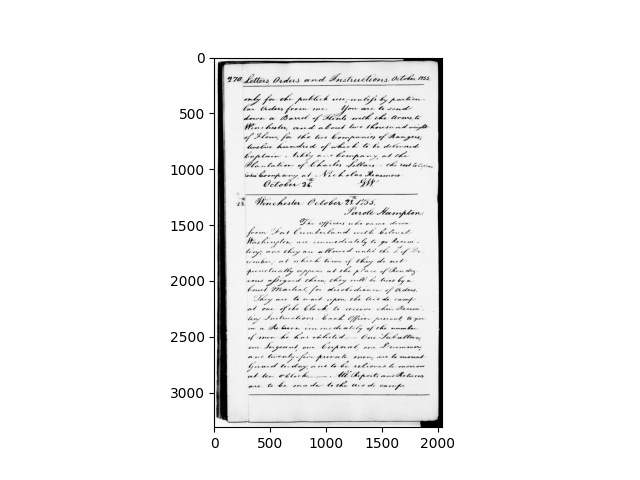

In [19]:
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

image = "2700270"
imagePath = f"./gw/pages/{image}.png"
gtPath = f"./gw/ground_truth/{image}.gtp"
hgtPath = f"./gw/heuristic_ground_truth/{image}.gtp"

imageFile = Image.open(imagePath)

# Für später folgende Verarbeitungsschritte muss das Bild mit float32-Werten vorliegen.
im_arr = np.asarray(imageFile)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(im_arr, cmap=cm.get_cmap('Greys_r'))


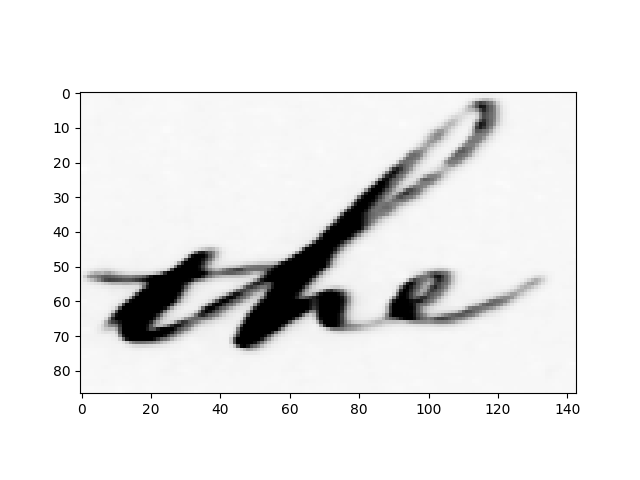

In [48]:
# load test image
labels = open(gtPath ,"r")
wordTheLine = labels.read().split("\n")[9].split(" ")
y1 , x1 , y2 , x2 = int(wordTheLine[0]) , int(wordTheLine[1]) , int(wordTheLine[2]) , int(wordTheLine[3])
testing_word_arr = im_arr[x1:x2, y1:y2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(testing_word_arr, cmap=cm.get_cmap('Greys_r'))

In [82]:
# compute the features of the test image 
from scipy.cluster.vq import kmeans2
from common.features import compute_sift_descriptors

testing_word_frames ,testing_word_desc  = compute_sift_descriptors(testing_word_arr)
page_frames ,page_desc  = compute_sift_descriptors(im_arr)
n_centroids = 3 
# create a cluster of the full image
_, labels = kmeans2(page_desc, n_centroids, iter=20, minit='points')

print(len(page_frames))

16932


<BarContainer object of 3 artists>

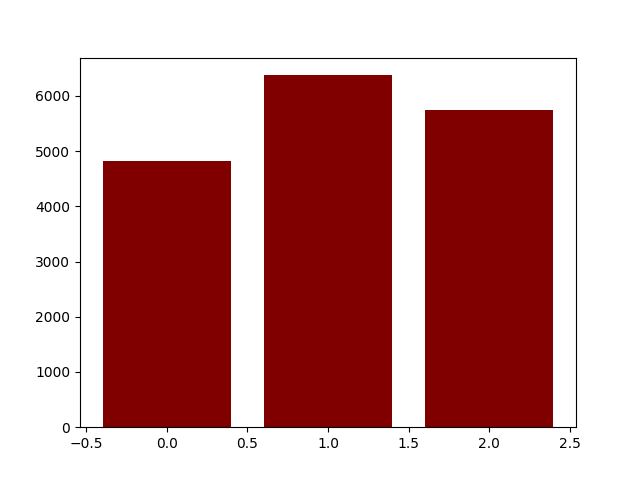

In [69]:
# compute the bag of features
bin_count = np.bincount(labels,minlength = n_centroids)
bin_count

fig = plt.figure()
ax = fig.add_subplot(111)
colormap = cm.get_cmap('jet')
ax.bar(list(range(n_centroids)) , bin_count , color = [colormap(bin) for bin in bin_count])

In [ ]:
# takes a position of a grid in the image and uses the cluster of sift desc to calculate the bag of features histgramm
def get_bag_of_words_histogram(sift_descriptors , sift_descriptors_positions , sift_descriptors_labels_array , x1 , x2 , y1 , y2):
	# sift_descriptors: the sift descriptors of the full image
	# sift_descriptors_positions: the positions of the sift descriptors in the full image
	# sift_descriptors_labels_array: an array that contains a label for each sift descriptors
	# x1,x2,y1,y2: the positions of the frame

	# the function works as follows:
		# go over all descriptors inside the frame
		# for each one of them get its label
		# increment a counter for each label
		# return the histogram
		# the histogram is a map of this form {'label' : count} e.g {'f1' : 4} means that the label f1 is coming 4 times inside the frame
	pass